In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# Убираем ограничение показа количества столбцов и строк
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_train = pd.read_csv('train.csv', header=0)
df_test = pd.read_csv('test.csv', header=0)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.shape

(1460, 81)

In [6]:
df_test.shape

(1459, 80)

# Объединение train и test

In [7]:
ds = pd.concat([df_train, df_test])

In [8]:
ds.shape

(2919, 81)

In [10]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Заполним пропущенные значения в столбцах с вещественными значениями:

In [11]:
ds.loc[ds['LotFrontage'].isnull() == True, 'LotFrontage'] = ds['LotFrontage'].median()

In [12]:
ds.loc[ds['MasVnrArea'].isnull() == True, 'MasVnrArea'] = ds['MasVnrArea'].median()

In [13]:
ds.loc[ds['GarageYrBlt'].isnull() == True, 'GarageYrBlt'] = ds['GarageYrBlt'].median()

In [14]:
ds = pd.get_dummies(ds)

In [15]:
ds.shape

(2919, 290)

In [16]:
df_train = ds[ds['SalePrice'].notnull()]
df_test = ds[ds['SalePrice'].isnull()]
df_test = df_test.drop(['SalePrice'], axis=1)

In [17]:
df_train.shape

(1460, 290)

In [18]:
df_test.shape

(1459, 289)

In [56]:
# pd.isnull(df_train).sum()

In [57]:
# pd.isnull(df_test.drop('Id', axis=1)).sum()

В тренировочном датасете пропусков нет, но в тестовом пропуски есть, их надо заполнить:

In [20]:
df_test.loc[df_test['BsmtFinSF1'].isnull() == True, 'BsmtFinSF1'] = df_test['BsmtFinSF1'].mean()

In [21]:
df_test.loc[df_test['BsmtFinSF2'].isnull() == True, 'BsmtFinSF2'] = df_test['BsmtFinSF2'].mean()

In [22]:
df_test.loc[df_test['BsmtUnfSF'].isnull() == True, 'BsmtUnfSF'] = df_test['BsmtUnfSF'].mean()

In [23]:
df_test.loc[df_test['TotalBsmtSF'].isnull() == True, 'TotalBsmtSF'] = df_test['TotalBsmtSF'].mean()

In [24]:
df_test.loc[df_test['BsmtFullBath'].isnull() == True, 'BsmtFullBath'] = df_test['BsmtFullBath'].mean()

In [25]:
df_test.loc[df_test['BsmtHalfBath'].isnull() == True, 'BsmtHalfBath'] = df_test['BsmtHalfBath'].mean()

In [26]:
df_test.loc[df_test['GarageCars'].isnull() == True, 'GarageCars'] = df_test['GarageCars'].mean()

In [27]:
df_test.loc[df_test['GarageArea'].isnull() == True, 'GarageArea'] = df_test['GarageArea'].mean()

In [28]:
# pd.isnull(df_test.drop('Id', axis=1)).sum()

Посмотрим на распределение вещественных переменных:

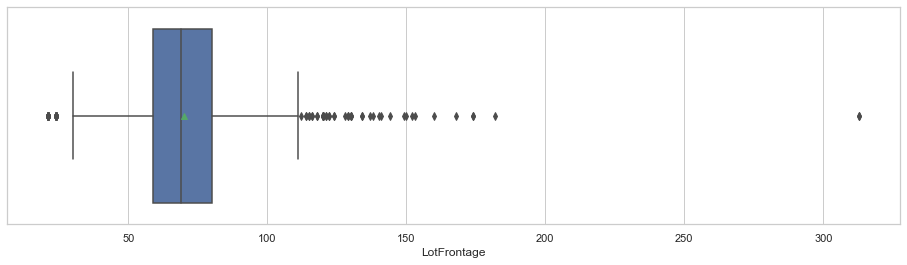

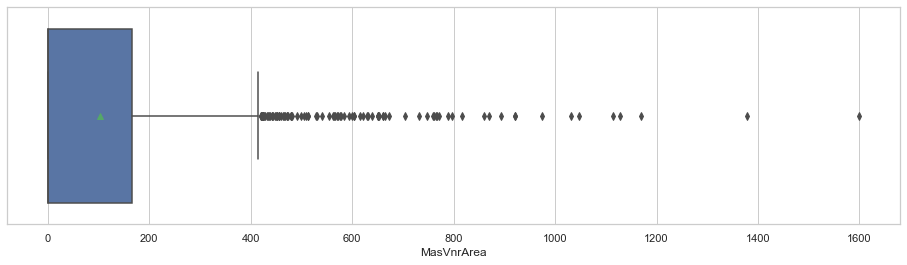

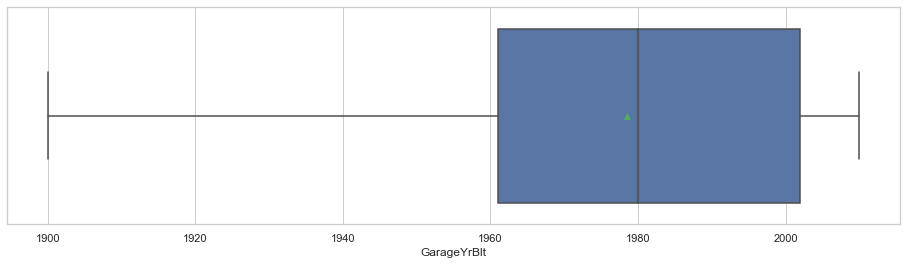

In [20]:
numerical_df = df_train.select_dtypes(include=['float'])
# numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=numerical_df[column], showmeans=True)

# Обучение моделей

In [34]:
X = df_train.drop(['SalePrice', 'Id'], axis=1)

In [35]:
y = df_train['SalePrice']

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

In [37]:
X_train.shape

(1095, 288)

In [38]:
X_val.shape

(365, 288)

In [39]:
y_train.shape

(1095,)

In [40]:
y_val.shape

(365,)

In [41]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5, n_jobs=-1))
    return(rmse)

## KNNR

### Score: 0.24100

In [54]:
KNNR = KNeighborsRegressor(n_neighbors=3)
KNNR.fit(X_train, y_train)
y_pred = KNNR.predict(X_val)

print('Правильность на обучающем наборе: {:.4f}'.format(KNNR.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(KNNR.score(X_val, y_val)))

Правильность на обучающем наборе: 0.8199
Правильность на тестовом наборе: 0.6760


In [55]:
KNNR_score = rmse_cv(KNNR).mean()

In [58]:
KNNR_score

46912.525595646715

In [120]:
ids = df_test['Id']
predictions = KNNR.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('KNNR_0.6760_46251.5.csv', index=False)

## LinearRegression

In [59]:
LineReg = LinearRegression()
LineReg.fit(X_train, y_train)
y_pred = LineReg.predict(X_val)

print('Правильность на обучающем наборе: {:.4f}'.format(LineReg.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(LineReg.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9452
Правильность на тестовом наборе: 0.5479


In [60]:
LineReg_score = rmse_cv(LineReg).mean()

In [61]:
LineReg_score

137079999.22735927

## Ridge

In [62]:
ridge = Ridge(alpha=25)
ridge.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(ridge.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(ridge.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9101
Правильность на тестовом наборе: 0.7461


In [64]:
ridge_score = rmse_cv(ridge).mean()

In [65]:
ridge_score

31235.469911255546

In [216]:
ids = df_test['Id']
predictions = ridge.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('ridge25_0.7461_31235.5.csv', index=False)

## Ridge & PolynomialFeatures

In [66]:
%%time
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(), Ridge())

param_grid = {'ridge__alpha': [5, 10, 15,20], 
              'polynomialfeatures__degree': [1, 2]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train);

Wall time: 7.62 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2],
                         'ridge__alpha': [5, 10, 15, 20]})

In [67]:
print("Правильность на тестовом наборе: {:.4f}".format(grid.score(X_val, y_val)))
print("Наилучшие параметры: {}".format(grid.best_params_))
print("Наил значение правильности перекр проверки: {:.4f}".format(grid.best_score_))

Правильность на тестовом наборе: 0.7364
Наилучшие параметры: {'polynomialfeatures__degree': 1, 'ridge__alpha': 5}
Наил значение правильности перекр проверки: 0.8742


In [70]:
ridge_PF_score = rmse_cv(grid).mean()

In [71]:
ridge_PF_score

31291.568060491765

In [64]:
ids = df_test['Id']
predictions = grid.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('Ridge,PF_0.8742.csv', index=False)

## Lasso

In [72]:
lasso = Lasso(max_iter=10000, alpha=325)
lasso.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(lasso.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(lasso.score(X_val, y_val)))

Правильность на обучающем наборе: 0.8971
Правильность на тестовом наборе: 0.7358


In [73]:
lasso_score = rmse_cv(lasso).mean()

In [74]:
lasso_score

31257.236059106548

In [231]:
ids = df_test['Id']
predictions = lasso.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('lasso325_0.7358_31257.2.csv', index=False)

## RandomForestRegressor

### Score: 0.14877

In [75]:
RandForestR = RandomForestRegressor(n_estimators=500, max_depth=14, n_jobs=-1)
RandForestR.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(RandForestR.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(RandForestR.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9801
Правильность на тестовом наборе: 0.8524


In [76]:
RandForestR_score1 = rmse_cv(RandForestR).mean()

In [77]:
RandForestR_score1

29824.548860425555

In [272]:
ids = df_test['Id']
predictions = RandForestR.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('RandForestR500,14_0.8527_29852.9.csv', index=False)

### Score: 0.14871

In [78]:
RandForestR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RandForestR.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(RandForestR.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(RandForestR.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9805
Правильность на тестовом наборе: 0.8539


In [79]:
RandForestR_score2 = rmse_cv(RandForestR).mean()

In [80]:
RandForestR_score2

29859.678868104354

In [276]:
ids = df_test['Id']
predictions = RandForestR.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('RandForestR1000_0.8541_30024.9.csv', index=False)

## GradientBoostingRegressor

### Score: 0.14605

In [81]:
GradBoostR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=300, max_depth=2)
GradBoostR.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(GradBoostR.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(GradBoostR.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9730
Правильность на тестовом наборе: 0.9006


In [82]:
# 0.1,300,2
GradBoostR_score1 = rmse_cv(GradBoostR).mean()

In [83]:
GradBoostR_score1 

25444.57904068404

In [337]:
ids = df_test['Id']
predictions = GradBoostR.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('GradBoostR0.1,300,2_0.9000_25548.6.csv', index=False)

### Score: 0.13820

In [84]:
GradBoostR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=300, max_depth=3)
GradBoostR.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(GradBoostR.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(GradBoostR.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9900
Правильность на тестовом наборе: 0.8954


In [85]:
# 0.1,300,3
GradBoostR_score2 = rmse_cv(GradBoostR).mean()

In [86]:
GradBoostR_score2

25559.619986920723

In [333]:
ids = df_test['Id']
predictions = GradBoostR.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('GradBoostR0.1,300,3_0.8945_26057.5.csv', index=False)

### Score: 0.15842

In [87]:
GradBoostR = GradientBoostingRegressor(learning_rate=0.5, n_estimators=300, max_depth=2)
GradBoostR.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(GradBoostR.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(GradBoostR.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9956
Правильность на тестовом наборе: 0.8986


In [88]:
# 0.5,300,2
GradBoostR_score3 = rmse_cv(GradBoostR).mean()

In [89]:
GradBoostR_score3

27311.408154936835

In [335]:
ids = df_test['Id']
predictions = GradBoostR.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('GradBoostR0.5,300,2_0.8985_28000.5.csv', index=False)

### GradientBoostingRegressor & PolynomialFeatures

#### Score: 0.13368

In [56]:
%%time
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(), GradientBoostingRegressor(n_estimators=500))

param_grid = {'gradientboostingregressor__max_depth': [2], 
              'polynomialfeatures__degree': [1, 2]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train);

Wall time: 28min 10s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(n_estimators=500))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__max_depth': [2],
                         'polynomialfeatures__degree': [1, 2]})

In [57]:
print("Правильность на тестовом наборе: {:.4f}".format(grid.score(X_val, y_val)))
print("Наилучшие параметры: {}".format(grid.best_params_))
print("Наил значение правильности перекр проверки: {:.4f}".format(grid.best_score_))

Правильность на тестовом наборе: 0.8576
Наилучшие параметры: {'gradientboostingregressor__max_depth': 2, 'polynomialfeatures__degree': 2}
Наил значение правильности перекр проверки: 0.8742


In [60]:
ids = df_test['Id']
predictions = grid.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('GBR,PF_0.8742.csv', index=False)

## XGBRegressor

### Score: 0.15356

In [121]:
XGBR = XGBRegressor()
XGBR.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(XGBR.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(XGBR.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9997
Правильность на тестовом наборе: 0.8401


In [328]:
rmse_cv(XGBR).mean()

28760.12025831495

In [341]:
ids = df_test['Id']
predictions = XGBR.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR_0.8401_28760.1.csv', index=False)

### Score: 0.14430

In [91]:
XGBR = XGBRegressor(learning_rate = 0.15, n_estimators = 1000, max_depth = 2, n_jobs=-1)
XGBR.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(XGBR.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(XGBR.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9946
Правильность на тестовом наборе: 0.9169


In [325]:
# 0.15,1000,2
rmse_cv(XGBR).mean()

27191.273131205973

In [339]:
ids = df_test['Id']
predictions = XGBR.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR0.15,1000,2_0.9169_27191.3.csv', index=False)

### Score: 0.14131

In [92]:
XGBR = XGBRegressor(learning_rate = 0.14, n_estimators = 1000, max_depth = 2, n_jobs=-1)
XGBR.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(XGBR.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(XGBR.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9935
Правильность на тестовом наборе: 0.9172


In [93]:
# 0.14,1000,2
rmse_cv(XGBR).mean()

27328.7253873993

In [134]:
ids = df_test['Id']
predictions = XGBR.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR0.14,1000,2_0.9172.csv', index=False)

### XGradientBoostingRegressor & PolynomialFeatures

#### Score: 0.13829

In [95]:
XGBR = XGBRegressor(learning_rate=0.1, n_estimators=300, max_depth=3)
XGBR.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(XGBR.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(XGBR.score(X_val, y_val)))

Правильность на обучающем наборе: 0.9864
Правильность на тестовом наборе: 0.8707


In [96]:
ids = df_test['Id']
predictions = XGBR.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR,PF0.1,300,3_0.8707.csv', index=False)

#### Score: 0.13919

In [96]:
%%time
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(), XGBRegressor(n_estimators=200, n_jobs=-1))

param_grid = {'xgbregressor__max_depth': [i for i in range(2, 4)],
              'polynomialfeatures__degree': [1],
              'xgbregressor__learning_rate': [0.001,0.01,0.1,0.5,1,10,100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train);

D:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-3.42914778 -3.41067768  0.66152577  0.69783077  0.85485694  0.86594723
  0.8460915   0.83799933  0.77747523  0.76517902         nan         nan
         nan         nan]
  warnings.warn(


Wall time: 20.1 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=None, gpu_id=None,
                                                     gro

In [97]:
print("Правильность на тестовом наборе: {:.4f}".format(grid.score(X_val, y_val)))
print("Наилучшие параметры: {}".format(grid.best_params_))
print("Наил значение правильности перекр проверки: {:.4f}".format(grid.best_score_))

Правильность на тестовом наборе: 0.8698
Наилучшие параметры: {'polynomialfeatures__degree': 1, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3}
Наил значение правильности перекр проверки: 0.8659


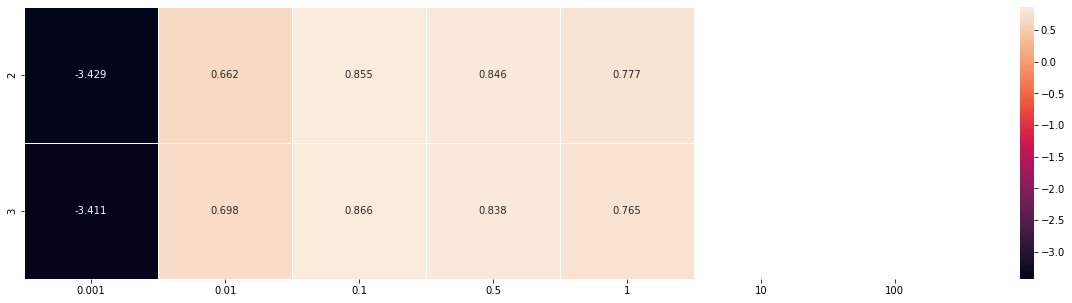

In [85]:
plt.figure(figsize=(21, 5))
sns.heatmap(grid.cv_results_['mean_test_score'].reshape(7, 2).T, annot=True, 
            xticklabels=param_grid['xgbregressor__learning_rate'], yticklabels=[i for i in range(2, 4)], linewidths=0.5, fmt=".3f");

In [98]:
ids = df_test['Id']
predictions = grid.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR,PF_0.8659.csv', index=False)

#### Score 0.13276

In [86]:
%%time
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(), XGBRegressor(n_estimators=200, n_jobs=-1))

param_grid = {'xgbregressor__max_depth': [i for i in range(2, 4)],
              'polynomialfeatures__degree': [2],
              'xgbregressor__learning_rate': [0.001,0.01,0.1,0.5,1,10,100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train);

D:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-3.41303538 -3.39202232  0.69496785  0.71873599  0.8662746   0.87019494
  0.83933917  0.83183853  0.72925667  0.66757011         nan         nan
         nan         nan]
  warnings.warn(


Wall time: 24min 17s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=None, gpu_id=None,
                                                     gro

In [87]:
print("Правильность на тестовом наборе: {:.4f}".format(grid.score(X_val, y_val)))
print("Наилучшие параметры: {}".format(grid.best_params_))
print("Наил значение правильности перекр проверки: {:.4f}".format(grid.best_score_))

Правильность на тестовом наборе: 0.8566
Наилучшие параметры: {'polynomialfeatures__degree': 2, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3}
Наил значение правильности перекр проверки: 0.8702


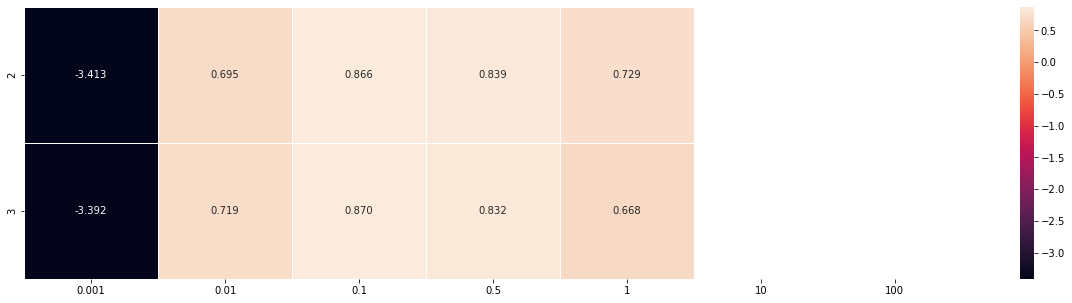

In [88]:
plt.figure(figsize=(21, 5))
sns.heatmap(grid.cv_results_['mean_test_score'].reshape(7, 2).T, annot=True, 
            xticklabels=param_grid['xgbregressor__learning_rate'], yticklabels=[i for i in range(2, 4)], linewidths=0.5, fmt=".3f");

In [95]:
ids = df_test['Id']
predictions = grid.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR,PF_0.8702.csv', index=False)

#### Score: 0.13610

In [99]:
%%time
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(), XGBRegressor(n_estimators=200, n_jobs=-1))

param_grid = {'xgbregressor__max_depth': [3],
              'polynomialfeatures__degree': [2],
              'xgbregressor__learning_rate': [0.2,0.3,0.4]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train);

Wall time: 8min 36s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=None, gpu_id=None,
                                                     gro

In [100]:
print("Правильность на тестовом наборе: {:.4f}".format(grid.score(X_val, y_val)))
print("Наилучшие параметры: {}".format(grid.best_params_))
print("Наил значение правильности перекр проверки: {:.4f}".format(grid.best_score_))

Правильность на тестовом наборе: 0.8630
Наилучшие параметры: {'polynomialfeatures__degree': 2, 'xgbregressor__learning_rate': 0.3, 'xgbregressor__max_depth': 3}
Наил значение правильности перекр проверки: 0.8629


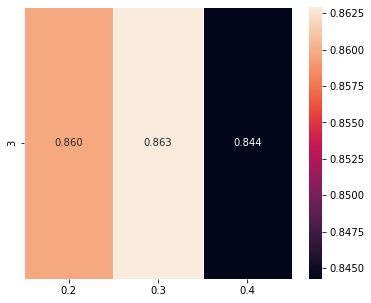

In [101]:
plt.figure(figsize=(6, 5))
sns.heatmap(grid.cv_results_['mean_test_score'].reshape(3, 1).T, annot=True, 
            xticklabels=param_grid['xgbregressor__learning_rate'], yticklabels=[i for i in range(3, 4)], linewidths=0.5, fmt=".3f");

In [102]:
ids = df_test['Id']
predictions = grid.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR,PF_0.8629.csv', index=False)

#### Score: 0.13266

In [103]:
%%time
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(), XGBRegressor(n_estimators=200, n_jobs=-1))

param_grid = {'xgbregressor__max_depth': [3],
              'polynomialfeatures__degree': [2],
              'xgbregressor__learning_rate': [0.05,0.06,0.07,0.08,0.09,0.1,1.01,1.02,1.03,1.04,1.05]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train);

Wall time: 25min 22s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=None, gpu_id=None,
                                                     gro

In [104]:
print("Правильность на тестовом наборе: {:.4f}".format(grid.score(X_val, y_val)))
print("Наилучшие параметры: {}".format(grid.best_params_))
print("Наил значение правильности перекр проверки: {:.4f}".format(grid.best_score_))

Правильность на тестовом наборе: 0.8569
Наилучшие параметры: {'polynomialfeatures__degree': 2, 'xgbregressor__learning_rate': 0.07, 'xgbregressor__max_depth': 3}
Наил значение правильности перекр проверки: 0.8734


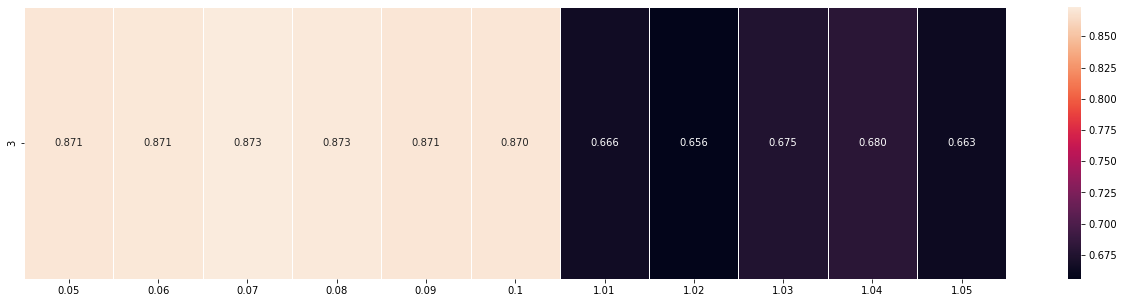

In [105]:
plt.figure(figsize=(22, 5))
sns.heatmap(grid.cv_results_['mean_test_score'].reshape(11, 1).T, annot=True, 
            xticklabels=param_grid['xgbregressor__learning_rate'], yticklabels=[i for i in range(3, 4)], linewidths=0.5, fmt=".3f");

In [106]:
ids = df_test['Id']
predictions = grid.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR,PF_0.8734.csv', index=False)

### XGradientBoostingRegressor & PolynomialFeatures & StandartScaler

#### Score: 0.13946

In [108]:
%%time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), XGBRegressor(n_estimators=200, n_jobs=-1))

param_grid = {'xgbregressor__max_depth': [3],
              'polynomialfeatures__degree': [2],
              'xgbregressor__learning_rate': [0.07,0.08,0.09,0.1]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train);

Wall time: 10min 59s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamm

In [109]:
print("Правильность на тестовом наборе: {:.4f}".format(grid.score(X_val, y_val)))
print("Наилучшие параметры: {}".format(grid.best_params_))
print("Наил значение правильности перекр проверки: {:.4f}".format(grid.best_score_))

Правильность на тестовом наборе: 0.8714
Наилучшие параметры: {'polynomialfeatures__degree': 2, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3}
Наил значение правильности перекр проверки: 0.8746


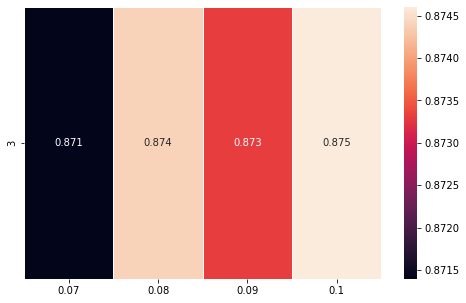

In [110]:
plt.figure(figsize=(8, 5))
sns.heatmap(grid.cv_results_['mean_test_score'].reshape(4, 1).T, annot=True, 
            xticklabels=param_grid['xgbregressor__learning_rate'], yticklabels=[i for i in range(3, 4)], linewidths=0.5, fmt=".3f");

In [111]:
ids = df_test['Id']
predictions = grid.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR,PF,SS_0.8746.csv', index=False)

### XGradientBoostingRegressor & PolynomialFeatures & MinMaxScaler

#### Score: 0.13060

In [97]:
%%time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(), XGBRegressor(n_estimators=200, n_jobs=-1))

param_grid = {'xgbregressor__max_depth': [3],
              'polynomialfeatures__degree': [2],
              'xgbregressor__learning_rate': [0.07,0.08,0.09,0.1]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train);

Wall time: 4min 41s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=No

In [98]:
print("Правильность на тестовом наборе: {:.4f}".format(grid.score(X_val, y_val)))
print("Наилучшие параметры: {}".format(grid.best_params_))
print("Наил значение правильности перекр проверки: {:.4f}".format(grid.best_score_))

Правильность на тестовом наборе: 0.8614
Наилучшие параметры: {'polynomialfeatures__degree': 2, 'xgbregressor__learning_rate': 0.08, 'xgbregressor__max_depth': 3}
Наил значение правильности перекр проверки: 0.8791


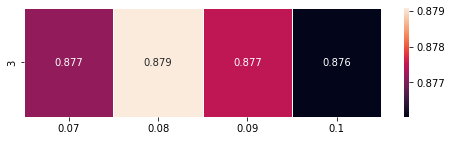

In [99]:
plt.figure(figsize=(8, 2))
sns.heatmap(grid.cv_results_['mean_test_score'].reshape(4, 1).T, annot=True, 
            xticklabels=param_grid['xgbregressor__learning_rate'], yticklabels=[i for i in range(3, 4)], linewidths=0.5, fmt=".3f");

In [115]:
ids = df_test['Id']
predictions = grid.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR,PF,MMS_0.8791.csv', index=False)

#### Score: 0.13246

In [135]:
%%time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(), XGBRegressor(n_estimators=200, n_jobs=-1))

param_grid = {'xgbregressor__max_depth': [3],
              'polynomialfeatures__degree': [2],
              'xgbregressor__learning_rate': [0.076,0.077,0.078,0.079,0.08,0.081,0.82]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train);

Wall time: 25min 21s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=No

In [136]:
print("Правильность на тестовом наборе: {:.4f}".format(grid.score(X_val, y_val)))
print("Наилучшие параметры: {}".format(grid.best_params_))
print("Наил значение правильности перекр проверки: {:.4f}".format(grid.best_score_))

Правильность на тестовом наборе: 0.8662
Наилучшие параметры: {'polynomialfeatures__degree': 2, 'xgbregressor__learning_rate': 0.076, 'xgbregressor__max_depth': 3}
Наил значение правильности перекр проверки: 0.8803


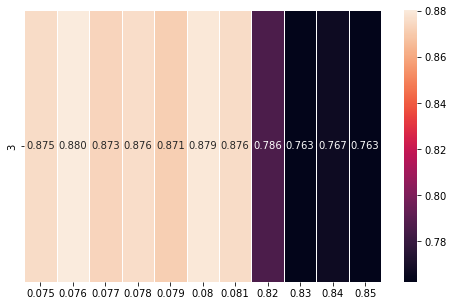

In [137]:
plt.figure(figsize=(22, 2))
sns.heatmap(grid.cv_results_['mean_test_score'].reshape(11, 1).T, annot=True, 
            xticklabels=param_grid['xgbregressor__learning_rate'], yticklabels=[i for i in range(3, 4)], linewidths=0.5, fmt=".3f");

In [138]:
ids = df_test['Id']
predictions = grid.predict(df_test.drop('Id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('XGBR,PF,MMS_0.8803.csv', index=False)

## MLPR

In [354]:
SS = StandardScaler()
SS.fit(X_train)
X_train_SS = SS.transform(X_train)
X_val_SS = SS.transform(X_val)

In [355]:
MLPR = MLPRegressor(max_iter = 10000, hidden_layer_sizes=(100,100))
MLPR.fit(X_train_SS, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(MLPR.score(X_train_SS, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(MLPR.score(X_val_SS, y_val)))

Правильность на обучающем наборе: 0.9998
Правильность на тестовом наборе: 0.1412


In [356]:
rmse_cv(MLPR).mean()

36074.309949738425

In [357]:
MLPR = MLPRegressor(max_iter = 10000, hidden_layer_sizes=(100))
MLPR.fit(X_train_SS, y_train)

print('Правильность на обучающем наборе: {:.4f}'.format(MLPR.score(X_train_SS, y_train)))
print('Правильность на тестовом наборе: {:.4f}'.format(MLPR.score(X_val_SS, y_val)))

Правильность на обучающем наборе: 0.9752
Правильность на тестовом наборе: 0.4097


D:\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [358]:
rmse_cv(MLPR).mean()

36828.60591449098

# Вывод

Наилучший Score у XGradientBoostingRegressor & PolynomialFeatures & MinMaxScaler = 0.13060